# FYP Breast Cancer Analysis

## Data Preprocessing

### Importing relavent packages

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Read Data from file

In [4]:
X = np.load('X.npy')
Y = np.load('Y.npy')

### Analyse Data by Printing relavent Info

In [5]:
def describeData(a,b):
    print('Total number of images: ' + str(len(a)))
    print('% of +ve images: ' + str(100*np.mean(b)))
    print('Images with IDC: ' + str(np.sum(b==1)))
    print('Images without IDC: ' + str(np.sum(b==0)))
    print('Image shape: ' + str(a[0].shape))
describeData(X,Y)

Total number of images: 5547
% of +ve images: 50.26140255994231
Images with IDC: 2788
Images without IDC: 2759
Image shape: (50, 50, 3)


### Ploting Data to look at images

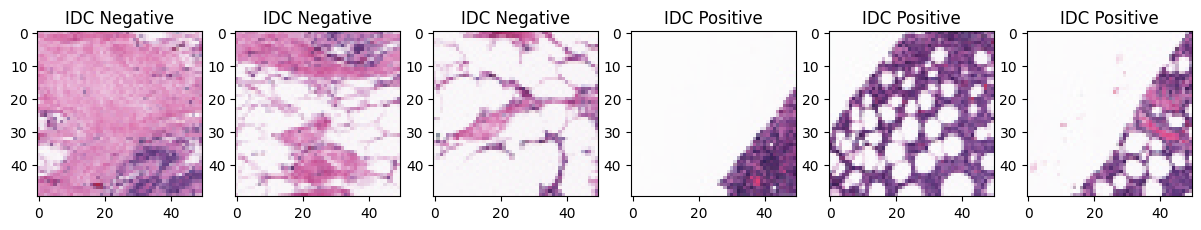

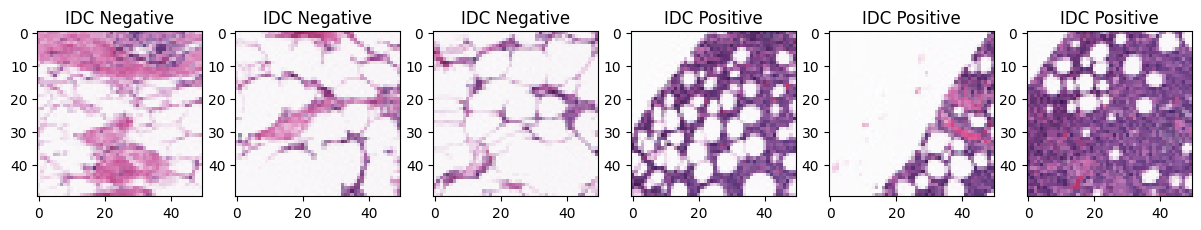

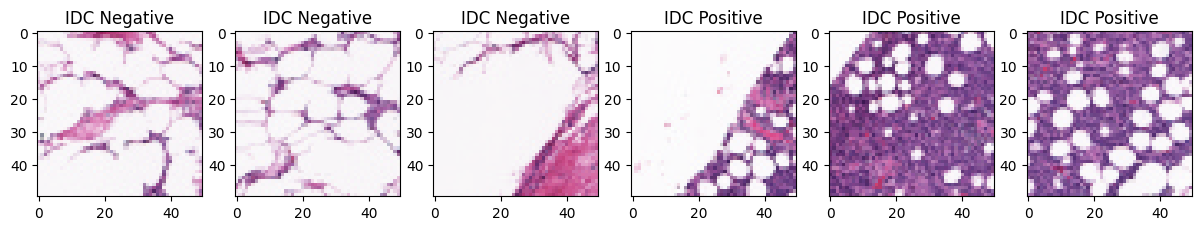

In [6]:
img0 = X[Y==0] # Print image without IDC 
img1 = X[Y==1] # Print image with IDC

def plot(a,b): 
    for row in range(3):
        plt.figure(figsize=(20, 10))
        for col in range(3):
            plt.subplot(1,8,col+1)
            plt.title('IDC Negative')
            plt.imshow(a[row+col])   
            plt.subplot(1,8,col+4)
            plt.title('IDC Positive')
            plt.imshow(b[row+col])
            
plot(img0, img1)

### Preprocessing the Data

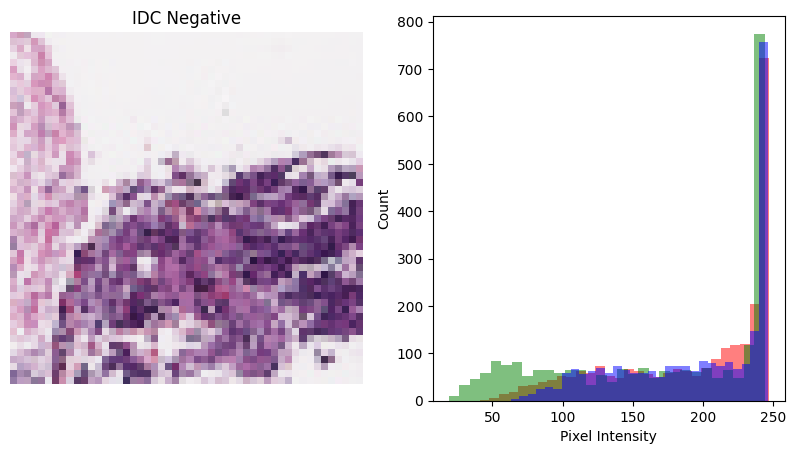

In [7]:
def plotHistogram(a):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    plt.title('IDC Positive' if Y[1] else 'IDC Negative')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(X[100])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#Split data to train and Test sets
X_train = X_train[0:30000] 
Y_train = Y_train[0:30000]
X_test = X_test[0:30000] 
Y_test = Y_test[0:30000]

# Normalize the data by dividing by 256
X_train = X_train / 256.0
X_test = X_test / 256.0

print("Training Data Shape:", X_train.shape, X_train.shape)
print("Testing Data Shape:", X_test.shape, X_test.shape)

Training Data Shape: (4437, 50, 50, 3) (4437, 50, 50, 3)
Testing Data Shape: (1110, 50, 50, 3) (1110, 50, 50, 3)


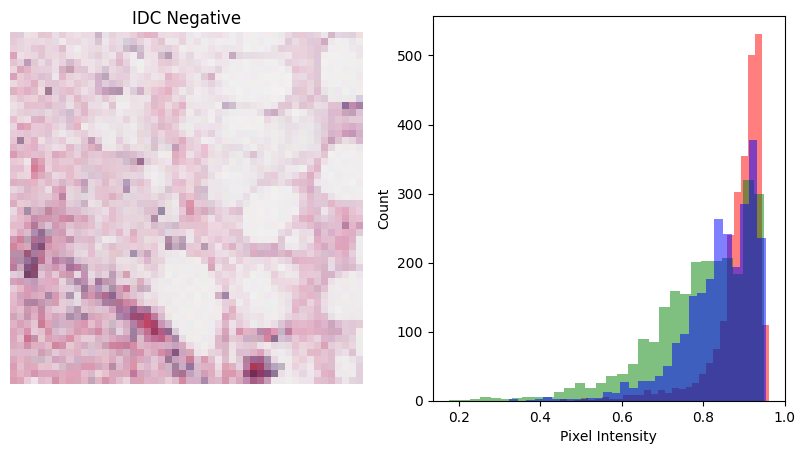

In [10]:
plotHistogram(X_train[100])

### Make Data 1D for compatability with standard classifiers due to imbalanced classes

In [11]:
X_trainShape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_testShape = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]

X_trainFlat = X_train.reshape(X_train.shape[0], X_trainShape)
X_testFlat = X_test.reshape(X_test.shape[0], X_testShape)

## Building Baseline (Naive Bayes)

### Importing required libraries

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

In [13]:
modelNB = GaussianNB()

### Fit the model with the training data

In [14]:
modelNB.fit(X_trainFlat,Y_train)

GaussianNB()

### Predict the target on the train dataset

In [15]:
predict_trainNB = modelNB.predict(X_trainFlat)
print('Target on train data',predict_trainNB) 

Target on train data [1 1 1 ... 0 0 0]


### F1 Score on train dataset

In [16]:
F1_trainNB = f1_score(Y_train,predict_trainNB)
print('F1_score on train dataset : ', F1_trainNB)

F1_score on train dataset :  0.7081694052302708


### Predict the target on the test dataset

In [17]:
predict_testNB = modelNB.predict(X_testFlat)
print('Target on test data',predict_testNB) 

Target on test data [0 0 1 ... 1 1 0]


### F1 Score on test dataset

In [18]:
F1_testNB = f1_score(Y_test,predict_testNB)
print('F1_score on test dataset : ', F1_testNB)

F1_score on test dataset :  0.6986817325800376


### Confusion Matrix on test dataset

In [19]:
from sklearn import metrics

In [20]:
confusion_matrixNB = metrics.confusion_matrix(Y_test, predict_testNB) 
cm_displayNB = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrixNB, display_labels = [False, True])

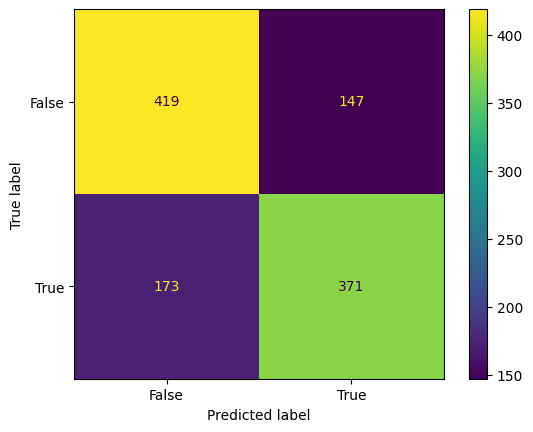

In [21]:
cm_displayNB.plot()
plt.show()

## Building Baseline (Decision Tree)

### Importing required libraries

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
modelDT = DecisionTreeClassifier(criterion="entropy")

### Fit the model with the training data

In [24]:
modelDT.fit(X_trainFlat,Y_train)

DecisionTreeClassifier(criterion='entropy')

### Predict the target on the train dataset

In [25]:
predict_trainDT = modelDT.predict(X_trainFlat)
print('Target on train data',predict_trainDT) 

Target on train data [1 1 0 ... 1 0 0]


### F1 Score on train dataset

In [26]:
F1_trainDT = f1_score(Y_train,predict_trainDT)
print('F1_score on train dataset : ', F1_trainDT)

F1_score on train dataset :  1.0


### Predict the target on the test dataset

In [27]:
predict_testDT = modelDT.predict(X_testFlat)
print('Target on test data',predict_testDT) 

Target on test data [1 0 1 ... 0 1 0]


### F1 Score on test dataset

In [28]:
F1_testDT = f1_score(Y_test,predict_testDT)
print('F1_score on test dataset : ', F1_testDT)

F1_score on test dataset :  0.6775067750677506


### Confusion Matrix on test dataset

In [29]:
confusion_matrixDT = metrics.confusion_matrix(Y_test, predict_testDT) 
cm_displayDT = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrixDT, display_labels = [False, True])

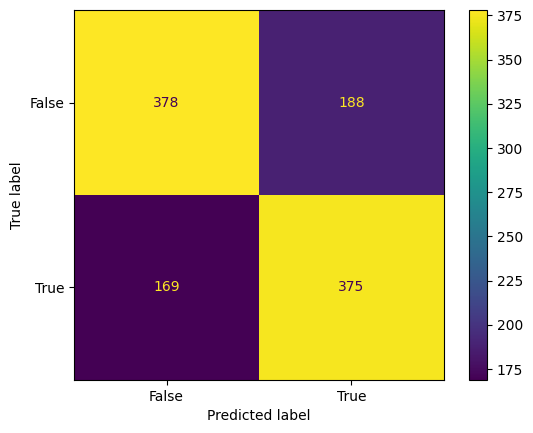

In [30]:
cm_displayDT.plot()
plt.show()